In [116]:
import folium
from folium import plugins
import numpy as np
import pandas as pd
import random
import json
import pprint as pp
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [136]:
p = 0.01
# csv_file = '../s2/carid_distribution.txt'
csv_file = r'../s2/leveldb_res.txt'
data = pd.read_csv(csv_file, 
#                    nrows=10000, 
#                    skiprows=lambda i: i>0 and random.random() > p, header=None
                  )
drop_colums = [7,8,9,10,12]
data.drop(data.columns[drop_colums],axis=1,inplace=True)
data.columns = ['Taxi_ID','Longitude','Latitude','Timestamp','Device_ID','Velocity','Orientation','Taxi_Color',""]
# latitude, longitude
location = [22.618864, 114.027283]
m = folium.Map(location, zoom_start=11, tiles='Stamen Toner')

data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in data.iterrows()]
heat_map = plugins.HeatMap(heat_data, 
                           radius = 7,
                           min_opacity = 0.5,
                           blur=15,
                           #max_zoom=1
                          )
m.add_child(heat_map)
m.save('shenzhen.html')

# m.add_child(roads)
# m.save('shenzhen_with_roads.html')

In [137]:
# fast convert json to csv
geo = r'../s2/nearest_edge.json'
with open(geo) as f:
    d = json.load(f)
df = json_normalize(d['features'])
df['road_num'] = pd.Categorical(df["properties.road_id"])
df['car_id'] = pd.Categorical(df["properties.carid"])
df['car_id'] = df.car_id.cat.codes
df['car_id_hex'] = df['car_id'].apply(lambda x: ("%04x" % x))
df['road_num'] = df.road_num.cat.codes
df['road_num'] = pd.Categorical(df['road_num'])
df['properties.point_id_int'] = df['properties.point_id'].apply(lambda x: int(x, 16))
df['properties.road_id_int'] = df['properties.road_id'].apply(lambda x: int(x, 16))
df['point_id_f4'] = df['properties.point_id'].apply(lambda x: x[4:])
df['point_id_new'] = df['point_id_f4'] + df['car_id_hex']
df['point_id_new_int'] = df['point_id_new'].apply(lambda x: int(x,16))

df['time_hex'] = df['properties.time'].apply(lambda x: x[-4:])
df['road_id_f4'] = df['properties.road_id'].apply(lambda x: x[4:])
df['road_id_new'] = df['road_id_f4'] + df['car_id_hex']
df['road_id_new_int'] = df['road_id_new'].apply(lambda x: int(x,16))
# df['road_id_new_int_small'] =  df['road_id_new_int'] -   17579810700000000000
# df['road_id_new_int_small_hex'] = df['road_id_new_int_small'].apply(lambda x: hex(x)[2:])
# df['road_id_new_int_addCarid'] = df['road_id_new_int'] + df['properties.carid']
# df['aggregated_id_int'] = df['aggregated_id'].apply(lambda x: int64(x,16))
df

,geometry.coordinates,geometry.type,properties.carid,properties.point_id,properties.point_id_,properties.road_id,properties.road_id_,properties.road_pos,properties.target_point,properties.time,...,car_id_hex,properties.point_id_int,properties.road_id_int,point_id_f4,point_id_new,point_id_new_int,time_hex,road_id_f4,road_id_new,road_id_new_int
0,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1701337,3403f4382b4334fd,3403f4382b4334fd0019f5d9,3403f439d497f211,3403f439d497f2110019f5d9,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543035]",00000000581858a0,...,0232,3748107836983555325,3748107844119425553,f4382b4334fd,f4382b4334fd0232,17597863111602012722,58a0,f439d497f211,f439d497f2110232,17598330767993274930
1,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1230932,3403f4382b4334fd,3403f4382b4334fd0012c854,3403f439d497f211,3403f439d497f2110012c854,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543035]",00000000581876af,...,0008,3748107836983555325,3748107844119425553,f4382b4334fd,f4382b4334fd0008,17597863111602012168,76af,f439d497f211,f439d497f2110008,17598330767993274376
2,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1457065,3403f4382b4334fd,3403f4382b4334fd00163ba9,3403f439d497f211,3403f439d497f21100163ba9,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543035]",000000005818c419,...,00c4,3748107836983555325,3748107844119425553,f4382b4334fd,f4382b4334fd00c4,17597863111602012356,c419,f439d497f211,f439d497f21100c4,17598330767993274564
3,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1319367,3403f4382b4334fd,3403f4382b4334fd001421c7,3403f439d497f211,3403f439d497f211001421c7,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543035]",00000000581824c6,...,0022,3748107836983555325,3748107844119425553,f4382b4334fd,f4382b4334fd0022,17597863111602012194,24c6,f439d497f211,f439d497f2110022,17598330767993274402
4,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1568613,3403f4382b434a8f,3403f4382b434a8f0017ef65,3403f439d497f211,3403f439d497f2110017ef65,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543034]",0000000058182e81,...,0165,3748107836983560847,3748107844119425553,f4382b434a8f,f4382b434a8f0165,17597863111963902309,2e81,f439d497f211,f439d497f2110165,17598330767993274725
5,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1573737,3403f4382b434a8f,3403f4382b434a8f00180369,3403f439d497f211,3403f439d497f21100180369,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543034]",000000005818889a,...,017d,3748107836983560847,3748107844119425553,f4382b434a8f,f4382b434a8f017d,17597863111963902333,889a,f439d497f211,f439d497f211017d,17598330767993274749
6,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1529670,3403f4382b434a8f,3403f4382b434a8f00175746,3403f439d497f211,3403f439d497f21100175746,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543034]",000000005818bec7,...,014c,3748107836983560847,3748107844119425553,f4382b434a8f,f4382b434a8f014c,17597863111963902284,bec7,f439d497f211,f439d497f211014c,17598330767993274700
7,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1529670,3403f4382b434a8f,3403f4382b434a8f00175746,3403f439d497f211,3403f439d497f21100175746,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543034]",000000005818bed6,...,014c,3748107836983560847,3748107844119425553,f4382b434a8f,f4382b434a8f014c,17597863111963902284,bed6,f439d497f211,f439d497f211014c,17598330767993274700
8,"[[114.08415985107422, 22.542621612548828], [11...",LineString,1647019,3403f4382b434b7b,3403f4382b434b7b001921ab,3403f439d497f211,3403f439d497f211001921ab,"[114.08415603637695, 22.542871475219727]","[114.084154, 22.543033]",0000000058184bf3,...,01c4,3748107836983561083,3748107844119425553,f4382b434b7b,f4382b434b7b01c4,17597863111979368900,4bf3,f439d497f211,f439d497f21101c4,17598330767993274820
9,"[[114.08415985107422, 22.542621612548828], [11...",LineString

In [138]:
def new_edge(a,b):
    edge = {}
    edge['type'] = 'Feature'
    geometry = {}
    geometry['type'] = 'LineString'
    geometry['coordinates'] = [a,b]
    edge['geometry'] = geometry
    return edge

df_road = df.drop_duplicates(subset='properties.road_id', keep="last")
# print(df_road['properties.road_pos'])
locationlist = df_road['properties.road_pos'].tolist()

roads_json = {}
roads_json['type'] = 'FeatureCollection'
roads_json['features'] = []

for point in range(0, len(locationlist)):
    lat = locationlist[point][1]
    lng = locationlist[point][0]
    folium.Marker(
        [lat, lng], 
         popup=df_road.iloc[[point]]["properties.road_id"].item()
    ).add_to(m)
    a = df_road.iloc[[point]]["geometry.coordinates"].tolist()[0][0]
    b = df_road.iloc[[point]]["geometry.coordinates"].tolist()[0][1]
    roads_json['features'].append(new_edge(a,b))

    
road_dedup = '../s2/nearest_edge_deduplicated.json'
with open(road_dedup, 'w') as outfile:  
    json.dump(roads_json,outfile, indent=4)

folium.GeoJson(
    road_dedup,
    name='geojson',
    style_function=lambda feature: {
    'fillColor': '#00ff00',
#     'color': 'blue',
    'weight': 2,
    'dashArray': '5, 5',
    'fillOpacity': 0.3,
    }
).add_to(m)

m.save('shenzhen_with_roads.html')

3748107836983555325 3748107844793000975


Text(0,0.5,'Road Id')

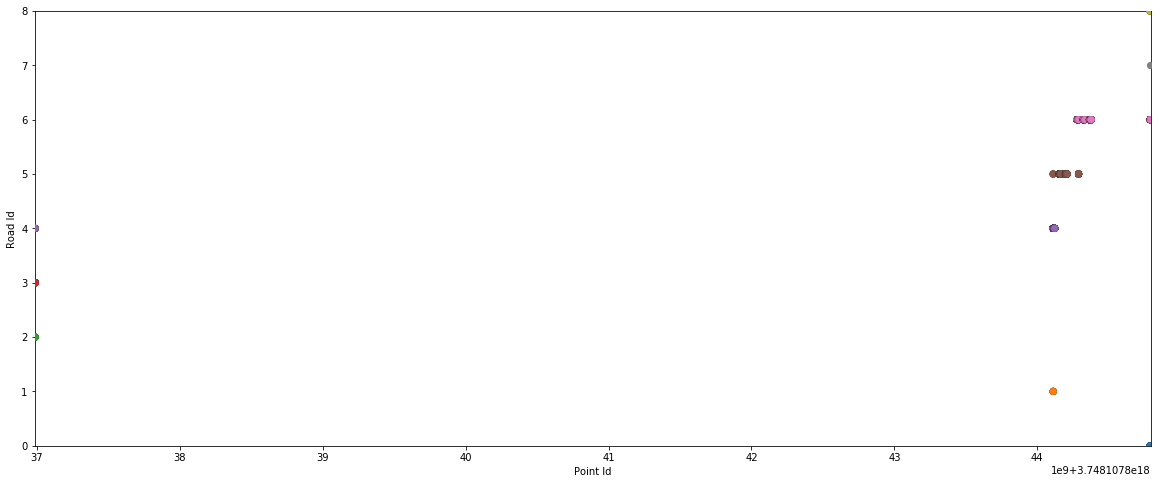

In [139]:
fig, ax_ = plt.subplots()
fig.set_size_inches(20,8)
ax_ = sns.stripplot(x="properties.point_id_int", y="road_num", data=df,
                   dodge=True,jitter=False,
                   linewidth=0.1,
                   size = 7
                  )
print(min(df['properties.point_id_int']), max(df['properties.point_id_int']))
ax_.set_ylim(0,max(df['road_num']))
ax_.set_xlim(min(df['properties.point_id_int']), max(df['properties.point_id_int']))
plt.xlabel('Point Id')
plt.ylabel('Road Id')

# fig.savefig('example.png', dpi = 900)

(0, 1920)

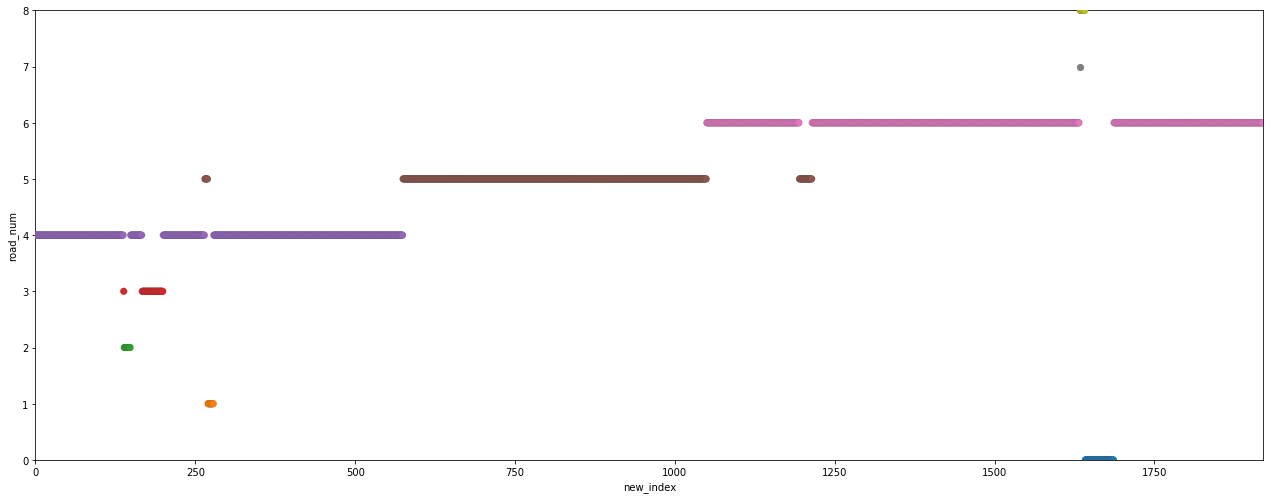

In [140]:
df_sort = df.sort_values(by=['point_id_new_int'])[['point_id_new_int','road_num']]
df_sort['new_index'] = range(len(df))
df_sort.head()
fig, ax = plt.subplots()
fig.set_size_inches(22,8.27)
ax = sns.stripplot(x="new_index", y="road_num", data=df_sort,
                   dodge=True,jitter=False,
                   linewidth=0.1,
                   size = 7
                  )
ax.set_ylim(0, max(df_sort['road_num']))
ax.set_xlim(min(df_sort['new_index']), max(df_sort['new_index']))


(0, 1920)

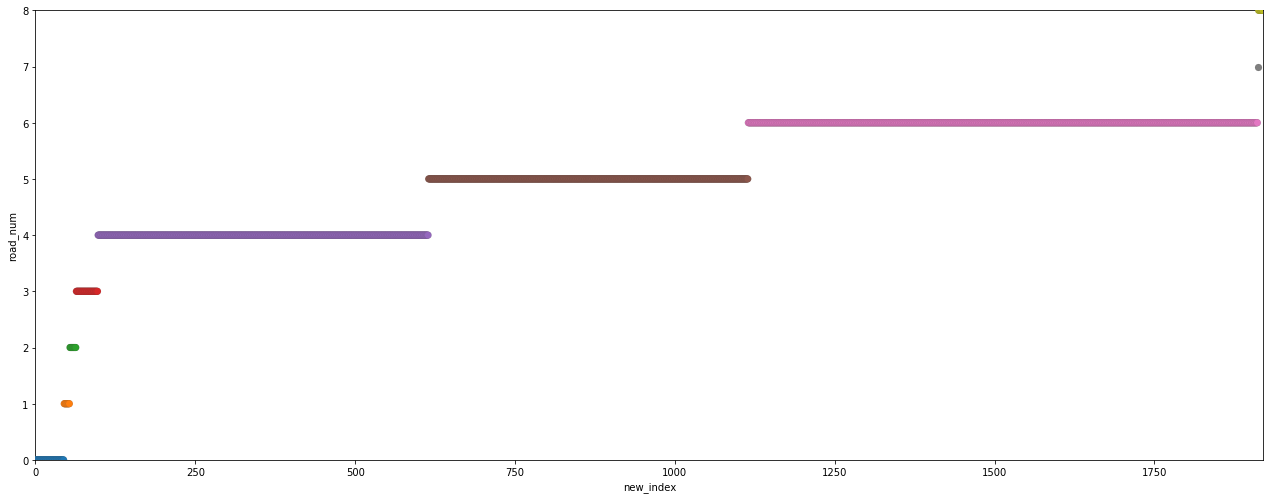

In [141]:
df_sort_road = df.sort_values(by=['road_id_new_int'])[['road_id_new_int','road_num']]
df_sort_road['new_index'] = range(len(df_sort_road))
fig, ax = plt.subplots()
fig.set_size_inches(22,8.27)
ax = sns.stripplot(x="new_index", y="road_num", data=df_sort_road,
                   dodge=True,jitter=False,
                   linewidth=0.1,
                   size = 7
                  )
ax.set_ylim(0, max(df_sort_road['road_num']))
ax.set_xlim(min(df_sort_road['new_index']), max(df_sort_road['new_index']))


In [134]:
array = \
[
                [114.14676666259766, 22.67038345336914],
                [114.14537048339844, 22.667354583740234],
                [114.14482879638672, 22.66610336303711],
                [114.144775390625, 22.665990829467773],
                [114.14452362060547, 22.665424346923828],
                [114.14432525634766, 22.664987564086914],
                [114.14312744140625, 22.662376403808594],
                [114.14252471923828, 22.661069869995117],
                [114.14220428466797, 22.660396575927734],
                [114.14193725585938, 22.659778594970703],
                [114.14170837402344, 22.659221649169922],
                [114.14152526855469, 22.658689498901367],
                [114.14137268066406, 22.658077239990234],
                [114.14128875732422, 22.65753746032715],
                [114.14119720458984, 22.656949996948242],
                [114.14115905761719, 22.65635108947754],
                [114.14112091064453, 22.65583038330078],
                [114.14114379882812, 22.655269622802734],
                [114.14119720458984, 22.654680252075195],
                [114.14125061035156, 22.654329299926758]
            ]
print("{",end='')
for a in array:
    print("{",end='')
    print (a[0],",",a[1],end='')
    print("},",end='')
print("}")

{{114.14676666259766 , 22.67038345336914},{114.14537048339844 , 22.667354583740234},{114.14482879638672 , 22.66610336303711},{114.144775390625 , 22.665990829467773},{114.14452362060547 , 22.665424346923828},{114.14432525634766 , 22.664987564086914},{114.14312744140625 , 22.662376403808594},{114.14252471923828 , 22.661069869995117},{114.14220428466797 , 22.660396575927734},{114.14193725585938 , 22.659778594970703},{114.14170837402344 , 22.659221649169922},{114.14152526855469 , 22.658689498901367},{114.14137268066406 , 22.658077239990234},{114.14128875732422 , 22.65753746032715},{114.14119720458984 , 22.656949996948242},{114.14115905761719 , 22.65635108947754},{114.14112091064453 , 22.65583038330078},{114.14114379882812 , 22.655269622802734},{114.14119720458984 , 22.654680252075195},{114.14125061035156 , 22.654329299926758},}


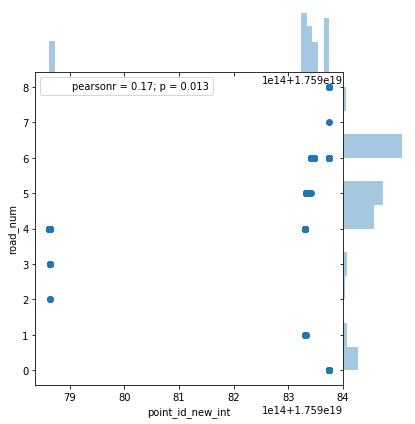

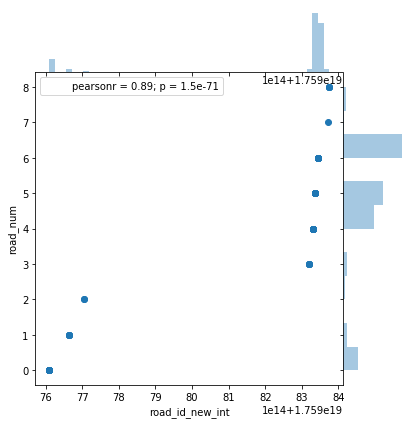

In [135]:
sns.jointplot("point_id_new_int", "road_num", data=df, space=0 )
sns.jointplot("road_id_new_int", "road_num", data=df, space=0 )